In [1]:
import numpy as np
 
def PCA(X , num_components):
     
    #Step-1
    X_meaned = X - np.mean(X , axis = 0)
     
    #Step-2
    cov_mat = np.cov(X_meaned , rowvar = False)
     
    #Step-3
    eigen_values , eigen_vectors = np.linalg.eigh(cov_mat)
     
    #Step-4
    sorted_index = np.argsort(eigen_values)[::-1]
    sorted_eigenvalue = eigen_values[sorted_index]
    sorted_eigenvectors = eigen_vectors[:,sorted_index]
     
    #Step-5
    eigenvector_subset = sorted_eigenvectors[:,0:num_components]
     
    #Step-6
    X_reduced = np.dot(eigenvector_subset.transpose() , X_meaned.transpose() ).transpose()
     
    return X_reduced
    

In [ ]:
import pandas as pd

# Generate random data with 5 features
np.random.seed(1)
X = np.random.randn(100, 5)

# Center and scale the data
X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0)
X = (X - X_mean) / X_std

# Create a dataset with two clusters
X_cluster1 = X[:50, :]
X_cluster2 = X[50:, :] + np.array([2, 2, 2, 2, 2])
X_cluster = np.vstack((X_cluster1, X_cluster2))

# Shuffle the data
np.random.shuffle(X_cluster)

# Save the data to a CSV file
np.savetxt('dataset.csv', X_cluster, delimiter=',')



#Get the dataset
data = pd.read_csv('dataset.csv')
 
#prepare the data
x = data.iloc[:,0:4]
 
#prepare the target
target = data.iloc[:,4]
 
#Applying it to PCA function
mat_reduced = PCA(x , 2)
 
#Creating a Pandas DataFrame of reduced Dataset
principal_df = pd.DataFrame(mat_reduced , columns = ['PC1','PC2'])
 
#Concat it with target variable to create a complete Dataset
principal_df = pd.concat([principal_df , pd.DataFrame(target)] , axis = 1)
print(x)

    1.882443474654543980e+00  1.923938398904445179e+00  \
0                  -0.602532                  0.487846   
1                  -1.513302                 -0.513242   
2                  -0.123391                 -0.887452   
3                   1.712332                 -2.032564   
4                  -0.104375                  0.942721   
..                       ...                       ...   
94                  0.075472                 -1.111766   
95                  1.498799                  3.071440   
96                 -0.021634                 -0.153821   
97                  1.759485                  2.386985   
98                  1.835620                  3.555095   

    2.416443117636948301e+00  1.095635212348836873e+00  
0                  -1.176894                  0.646551  
1                   0.092943                  0.724286  
2                  -0.790229                  1.578220  
3                  -0.376735                 -0.594060  
4                 

<Axes: >

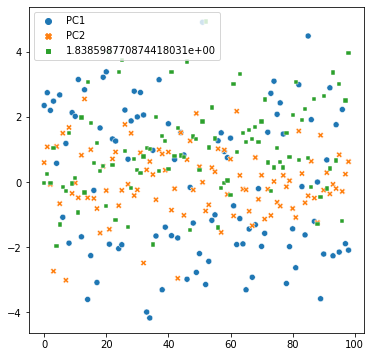

In [ ]:
import seaborn as sb
import matplotlib.pyplot as plt
 
plt.figure(figsize = (6,6))
sb.scatterplot(data = principal_df)